# Загрузка Pandas и очистка данных

In [409]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter
import re

In [410]:
df = pd.read_csv('D:\Aston\Pyton\skill\main_task.csv')

In [411]:
#Замена пропущенных значений в поле 'Cuisine Style' 
df['Cuisine Style'].fillna('Not Cuisine Style', inplace=True)
df['Cuisine_list']=df['Cuisine Style'].str.strip("'[]").str.split("', '")
s=list(Counter(df['Cuisine Style'].str.strip("'[]").str.split("', '").sum()))
#Число различных кухонь
Count_Cuisine=len(s)-1
#Наиболее часто встречающаяся кухня
CuisineStyle_often=Counter(df['Cuisine Style'].str.strip("'[]").str.split("', '").sum()).most_common(1)

In [412]:
#новое поле - кол-во кухонь, представленных в ресторане
df['Cuisine_count']=df['Cuisine_list'].str.len()
# Выделение дат из поля 'Reviews' на основе регулярных выражений 
import pandas as pd
import re
pattern_date = '(\d{2}/\d{2}/\d{4})'
def find_pattern(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['date'] = df['Reviews'].apply(lambda x: find_pattern(x,pattern_date))

In [413]:
# Новый датафрейм с датами отзывов
df1=df['date'].astype(str).str.strip("'[]").str.split("', '", expand=True)
df1[0].replace('None', 'NaN', inplace=True)
df2=pd.DataFrame()
df2['date1'] = pd.to_datetime(df1[0])
df1[1].replace('None', 'NaN', inplace=True)
df2['date2'] = pd.to_datetime(df1[1])


In [414]:
# распределение по годам для даты 1
df2['date1'].dt.year.value_counts()

2017.0    22529
2018.0     4230
2016.0     4018
2015.0     1520
2014.0      646
2013.0      301
2012.0      164
2011.0       50
2008.0       30
2010.0       21
2009.0       15
2007.0        4
2004.0        1
Name: date1, dtype: int64

In [415]:
# распределение по годам для даты 2
df2['date2'].dt.year.value_counts()

2017.0    19398
2016.0     4650
2015.0     1872
2018.0     1616
2014.0      752
2013.0      355
2012.0      202
2011.0       57
2008.0       30
2009.0       18
2010.0       16
2007.0        7
Name: date2, dtype: int64

In [416]:
#Присоединение дат к нашему датафрейму
df=pd.concat([df,df2],axis=1)

In [417]:
# Дельта во времени между отзывами
df['date_delta']=(df['date1']-df['date2'])
df['date_delta1'] = df['date_delta'].apply(lambda x: abs(x.total_seconds()/(3600*24)))

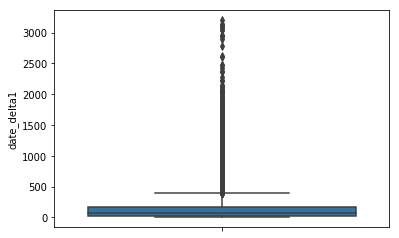

In [418]:
# Дельта во времени между отзывами - box plot
ax = sns.boxplot(y="date_delta1", data=df)

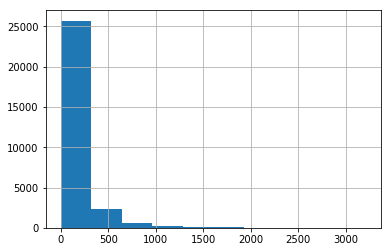

In [419]:
df['date_delta1'].hist()

In [420]:
#новая переменная- перекодировка 'Price Range' в числа
df['Price_Range_num'] = df['Price Range'].map({'$': 1, '$$ - $$$': 2, '$$$$': 3})

In [421]:
df['City'].value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [422]:
t=df.groupby(['City'])['Rating'].mean()
#нет особых различий по городам

In [423]:
t.to_dict()


{'Amsterdam': 4.1312154696132595,
 'Athens': 4.2300955414012735,
 'Barcelona': 3.9612289685442574,
 'Berlin': 4.124593967517401,
 'Bratislava': 3.9700996677740865,
 'Brussels': 3.9089622641509436,
 'Budapest': 4.0900735294117645,
 'Copenhagen': 3.9855842185128982,
 'Dublin': 4.061664190193165,
 'Edinburgh': 4.0880872483221475,
 'Geneva': 3.9625779625779627,
 'Hamburg': 4.021074815595363,
 'Helsinki': 3.9468085106382977,
 'Krakow': 4.146726862302483,
 'Lisbon': 4.046153846153846,
 'Ljubljana': 4.112021857923497,
 'London': 3.9550981413930866,
 'Luxembourg': 3.914285714285714,
 'Lyon': 3.9484304932735426,
 'Madrid': 3.800836550836551,
 'Milan': 3.8248945147679323,
 'Munich': 4.047032474804031,
 'Oporto': 4.178362573099415,
 'Oslo': 3.8935064935064934,
 'Paris': 3.9424137226873595,
 'Prague': 4.032571032571033,
 'Rome': 4.230269489894129,
 'Stockholm': 3.870121951219512,
 'Vienna': 4.078044596912521,
 'Warsaw': 4.089408528198074,
 'Zurich': 4.039962825278811}

In [424]:
#Перекодируем названия городов в цифры
region_dictionary = {'Amsterdam':0,
 'Athens': 1,
 'Barcelona': 2,
 'Berlin': 3,
 'Bratislava': 4,
 'Brussels': 5,
 'Budapest': 6,
 'Copenhagen': 7,
 'Dublin': 8,
 'Edinburgh': 9,
 'Geneva': 10,
 'Hamburg': 11,
 'Helsinki': 12,
 'Krakow': 13,
 'Lisbon': 14,
 'Ljubljana': 15,
 'London': 16,
 'Luxembourg': 17,
 'Lyon': 18,
 'Madrid': 19,
 'Milan': 20,
 'Munich': 21,
 'Oporto': 22,
 'Oslo': 23,
 'Paris': 24,
 'Prague': 25,
 'Rome': 26,
 'Stockholm': 27,
 'Vienna': 28,
 'Warsaw': 29,
 'Zurich': 30}
df['City_num'] = df['City'].apply(lambda x: region_dictionary[x])

In [425]:
# Создаем новые переменные на основе наличия той или иной кухни в ресторане
pattern_date1 = 'European'
def find_pattern1(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['European'] = df['Cuisine Style'].apply(lambda x: find_pattern1(x,pattern_date1))
df['European_num']=df['European'].astype(str).str.strip("'[]").map({'European': 1, 'None': 0})
pattern_date2 = 'French'
def find_pattern2(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['French'] = df['Cuisine Style'].apply(lambda x: find_pattern2(x,pattern_date2))
df['French_num']=df['French'].astype(str).str.strip("'[]").map({'French': 1, 'None': 0})
pattern_date3 = 'International'
def find_pattern3(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['International'] = df['Cuisine Style'].apply(lambda x: find_pattern3(x,pattern_date3))
df['International_num']=df['International'].astype(str).str.strip("'[]").map({'International': 1, 'None': 0})
pattern_date4 = 'Japanese'
def find_pattern4(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['Japanese'] = df['Cuisine Style'].apply(lambda x: find_pattern4(x,pattern_date4))
df['Japanese_num']=df['Japanese'].astype(str).str.strip("'[]").map({'Japanese': 1, 'None': 0})
pattern_date5 = 'Sushi'
def find_pattern5(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['Sushi'] = df['Cuisine Style'].apply(lambda x: find_pattern5(x,pattern_date5))
df['Sushi_num']=df['Sushi'].astype(str).str.strip("'[]").map({'Sushi': 1, 'None': 0})
pattern_date6 = 'Vegetarian Friendly'
def find_pattern6(string, pattern):
    if re.search(pattern, string):
        return re.findall(pattern, string)
df['Vegetarian Friendly'] = df['Cuisine Style'].apply(lambda x: find_pattern6(x,pattern_date6))
df['Vegetarian_Friendly_num']=df['Vegetarian Friendly'].astype(str).str.strip("'[]").map({'Vegetarian Friendly': 1, 'None': 0})

In [426]:
X = df.drop(['Restaurant_id','City','European', 'French', 'International',  'Japanese', 'Sushi','European_num','Vegetarian Friendly', 'Cuisine Style','Price Range','Reviews','Cuisine_list','date','date1', 'date2','date_delta','URL_TA','ID_TA'], axis = 1)  

X.fillna(X.mean(), inplace=True)
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [427]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
y = X['Rating']
X = X.drop(['Rating'], axis = 1)


In [428]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
Ranking                    40000 non-null float64
Number of Reviews          40000 non-null float64
Cuisine_count              40000 non-null int64
date_delta1                40000 non-null float64
Price_Range_num            40000 non-null float64
City_num                   40000 non-null int64
French_num                 40000 non-null int64
International_num          40000 non-null int64
Japanese_num               40000 non-null int64
Sushi_num                  40000 non-null int64
Vegetarian_Friendly_num    40000 non-null int64
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [429]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [430]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [431]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [432]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [433]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2252
